In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
# Image Size
img_size = (50, 100) #(height, width)
batch_size = 32


In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset',
    validation_split=0.2,
    subset = 'training',
    seed = 42,
    image_size = img_size,
    batch_size = batch_size
    
)

Found 754 files belonging to 2 classes.
Using 604 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset',
    validation_split = 0.2,
    subset = 'validation',
    seed = 42,
    image_size = img_size,
    batch_size = batch_size
)

Found 754 files belonging to 2 classes.
Using 150 files for validation.


In [5]:
# Optimize the dataset
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
from tensorflow.keras import layers, models

model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(50, 100, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")   # binary classification
])

model2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16192)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [7]:
history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
19/19 [==============================] - 5s 28ms/step - loss: 6.4800 - accuracy: 0.8361 - val_loss: 2.9721e-05 - val_accuracy: 1.0000
Epoch 2/10
19/19 [==============================] - 0s 9ms/step - loss: 0.1930 - accuracy: 0.9901 - val_loss: 1.6327e-12 - val_accuracy: 1.0000
Epoch 3/10
19/19 [==============================] - 0s 9ms/step - loss: 4.6086e-05 - accuracy: 1.0000 - val_loss: 1.8967e-10 - val_accuracy: 1.0000
Epoch 4/10
19/19 [==============================] - 0s 8ms/step - loss: 0.1480 - accuracy: 0.9901 - val_loss: 6.2012e-15 - val_accuracy: 1.0000
Epoch 5/10
19/19 [==============================] - 0s 8ms/step - loss: 0.2170 - accuracy: 0.9901 - val_loss: 2.6975e-10 - val_accuracy: 1.0000
Epoch 6/10
19/19 [==============================] - 0s 8ms/step - loss: 0.1830 - accuracy: 0.9950 - val_loss: 3.1309e-14 - val_accuracy: 1.0000
Epoch 7/10
19/19 [==============================] - 0s 8ms/step - loss: 0.0164 - accuracy: 0.9950 - val_loss: 4.9475e-09 - val_accu

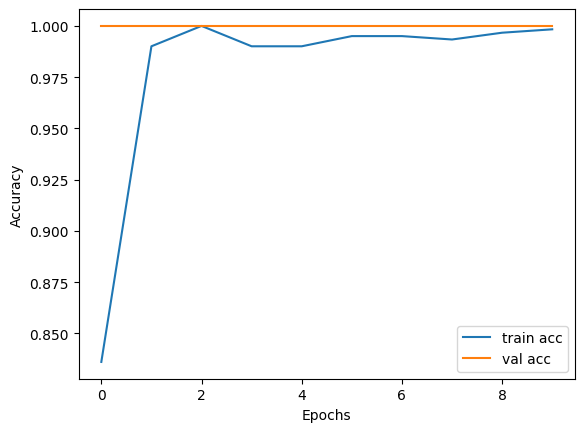

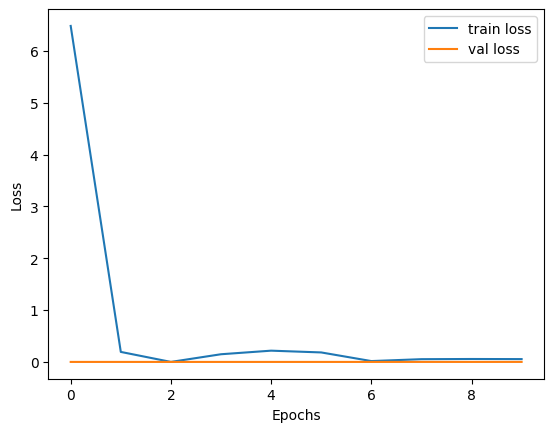

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
model2.save("car_parking_model.h5")